# Base de données accidents corporels de la circulation
https://www.data.gouv.fr/fr/datasets/base-de-donnees-accidents-corporels-de-la-circulation/

Ce jeu de données provient d'un service public certifié
 NEC MERGITUR
Pour chaque accident corporel (soit un accident survenu sur une voie ouverte à la circulation publique, impliquant au moins un véhicule et ayant fait au moins une victime ayant nécessité des soins), des saisies d’information décrivant l’accident sont effectuées par l’unité des forces de l’ordre (police, gendarmerie, etc.) qui est intervenue sur le lieu de l’accident. Ces saisies sont rassemblées dans une fiche intitulée bulletin d’analyse des accidents corporels. L’ensemble de ces fiches constitue le fichier national des accidents corporels de la circulation dit " Fichier BAAC " administré par l’Observatoire national interministériel de la sécurité routière "ONISR".

Les bases de données, extraites du fichier BAAC, répertorient l'intégralité des accidents corporels de la circulation intervenus durant une année précise en France métropolitaine ainsi que les départements d’Outre-mer (Guadeloupe, Guyane, Martinique, La Réunion et Mayotte depuis 2012) avec une description simplifiée. Cela comprend des informations de localisation de l’accident, telles que renseignées ainsi que des informations concernant les caractéristiques de l’accident et son lieu, les véhicules impliqués et leurs victimes.

Par rapport aux bases de données agrégées 2005-2010 et 2006-2011 actuellement disponibles sur le site www.data.gouv.fr, les bases de données de 2005 à 2016 sont désormais annuelles et composées de 4 fichiers (Caractéristiques – Lieux – Véhicules – Usagers ) au format csv.

Ces bases occultent néanmoins certaines données spécifiques relatives aux usagers et aux véhicules et à leur comportement dans la mesure où la divulgation de ces données porterait atteinte à la protection de la vie privée des personnes physiques aisément identifiables ou ferait apparaître le comportement de telles personnes alors que la divulgation de ce comportement pourrait leur porter préjudice (avis de la CADA – 2 janvier 2012).

# Téléchargement de la documentation
https://www.data.gouv.fr/fr/datasets/r/36496bab-a042-47bf-b08b-3c7467f2bddf

# données
https://www.data.gouv.fr/fr/datasets/r/be2191a6-a7cd-446f-a9fc-8d698688eb9e

https://www.data.gouv.fr/fr/datasets/r/e4c6f4fe-7c68-4a1d-9bb6-b0f1f5d45526

https://www.data.gouv.fr/fr/datasets/r/08b77510-39c4-4761-bf02-19457264790f

https://www.data.gouv.fr/fr/datasets/r/96aadc9f-0b55-4e9a-a70e-c627ed97e6f7


In [69]:
!git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   accidents_corporels_de_la_circulation.ipynb
	modified:   ib02_accidents_corporels_de_la_circulation.ipynb

Untracked files:
  (use "git add <file>..." to include in what will be committed)

	.ipynb_checkpoints/
	Untitled1.ipynb
	formation_python/

no changes added to commit (use "git add" and/or "git commit -a")


# -1) imports

In [70]:
%matplotlib inline
import seaborn as sns

In [71]:
import pandas as pd

In [72]:
import pandas as pd

# 0) Téléchargement des données

In [73]:
path_vehicule = "https://www.data.gouv.fr/fr/datasets/r/be2191a6-a7cd-446f-a9fc-8d698688eb9e"
vehicules_2016 = pd.read_csv(path_vehicule, encoding="latin1")
vehicules_2016.head()

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02


# 1) cleaning des colonnes

In [74]:
nouvelles_colonnes =["Num_Acc", "sens_de_Circulation", "catV","nb_occupants", "obstacle_fixe", "obstacle_mobile", "choc", "manoeuvre" , "num_vehicule" ]

In [75]:
nouvelles_colonnes

['Num_Acc',
 'sens_de_Circulation',
 'catV',
 'nb_occupants',
 'obstacle_fixe',
 'obstacle_mobile',
 'choc',
 'manoeuvre',
 'num_vehicule']

In [76]:
vehicules_2016.columns = nouvelles_colonnes
vehicules_2016.head()

,Num_Acc,sens_de_Circulation,catV,nb_occupants,obstacle_fixe,obstacle_mobile,choc,manoeuvre,num_vehicule
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02


In [77]:
vehicules_2016.shape

(101924, 9)

# 2) découvertes

In [78]:
vehicules_2016.groupby(["catV", "nb_occupants"])["Num_Acc"].count()

catV  nb_occupants
1     0                4705
2     0                3424
3     0                 436
7     0               64641
10    0                5584
13    0                 406
14    0                1031
15    0                 955
16    0                  43
17    0                 646
20    0                  91
21    0                 185
30    0                3953
31    0                2360
32    0                2087
33    0                8356
34    0                1515
35    0                  20
36    0                 137
37    0                 381
      1                 182
      2                  44
      3                  19
      4                   5
      5                  12
      6                   1
      7                   1
      8                   3
      9                   1
      10                 25
                      ...  
39    15                  1
      25                  1
      30                  1
      50                  1
 

In [79]:
!git add ./accidents_corporels_de_la_circulation.ipynb
!git commit -m "pour suivre"
!git push origin

[master 08dd961] pour suivre
 1 file changed, 115 insertions(+), 66 deletions(-)
Counting objects: 3, done.
Delta compression using up to 8 threads.
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 15.26 KiB | 3.05 MiB/s, done.
Total 3 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romainjouin/formation_python/
   5eb6f37..08dd961  master -> master


In [80]:
mask = vehicules_2016.catV!=7
vehicules_2016[mask]

,Num_Acc,sens_de_Circulation,catV,nb_occupants,obstacle_fixe,obstacle_mobile,choc,manoeuvre,num_vehicule
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02
6,201600000005,0.0,30,0,0.0,2.0,1.0,15.0,B02
9,201600000007,1.0,30,0,0.0,0.0,3.0,15.0,A01
14,201600000009,0.0,30,0,0.0,0.0,2.0,1.0,B02
17,201600000012,0.0,33,0,0.0,0.0,0.0,1.0,A01
19,201600000014,0.0,33,0,0.0,2.0,1.0,13.0,A01
20,201600000014,0.0,33,0,14.0,0.0,9.0,21.0,B02
22,201600000015,0.0,1,0,0.0,2.0,1.0,0.0,B02
23,201600000015,0.0,1,0,0.0,2.0,1.0,0.0,C03


In [81]:
tab = vehicules_2016[vehicules_2016.catV!=7].pivot_table(index=["catV"], 
                           columns= ["nb_occupants"], 
                           values=["Num_Acc"], 
                           aggfunc="count", 
                           fill_value=0)

In [82]:
tab.head()

Num_Acc                                     ...                  \
nb_occupants     0   1   2   3   4   5   6   7   8   9   ... 75  80  90  100   
catV                                                     ...                   
1               4705   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2               3424   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
3                436   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
10              5584   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
13               406   0   0   0   0   0   0   0   0   0 ...   0   0   0   0   

                                      
nb_occupants 120 140 150 200 210 300  
catV                                  
1              0   0   0   0   0   0  
2              0   0   0   0   0   0  
3              0   0   0   0   0   0  
10             0   0   0   0   0   0  
13             0   0   0   0   0   0  

[5 rows x 56 columns]

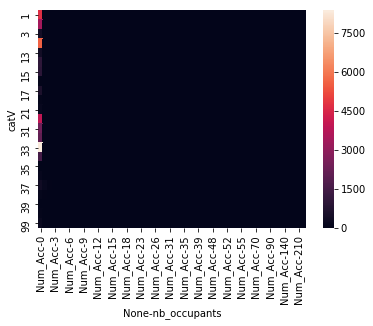

In [83]:
sns.heatmap(tab)

In [84]:
vehicules_2016.groupby(["catV"])["Num_Acc"].count()

catV
1      4705
2      3424
3       436
7     64641
10     5584
13      406
14     1031
15      955
16       43
17      646
20       91
21      185
30     3953
31     2360
32     2087
33     8356
34     1515
35       20
36      137
37      737
38      229
39       31
40      150
99      202
Name: Num_Acc, dtype: int64

In [85]:
cat_transports_en_commun = [37, 38, 39, 40]

In [86]:
vehicules_2016["transport_en_commun"] = vehicules_2016.catV.isin(cat_transports_en_commun)

In [87]:
vehicules_2016.head()

,Num_Acc,sens_de_Circulation,catV,nb_occupants,obstacle_fixe,obstacle_mobile,choc,manoeuvre,num_vehicule,transport_en_commun
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02,False
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01,False
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01,False
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01,False
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02,False


In [88]:
df_transport_en_commun = vehicules_2016[vehicules_2016.transport_en_commun]

In [89]:
df_transport_en_commun.shape

(1147, 10)

In [90]:
tab

Num_Acc                                      ...                  \
nb_occupants     0    1   2   3   4   5   6   7   8   9   ... 75  80  90  100   
catV                                                      ...                   
1               4705    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
2               3424    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
3                436    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
10              5584    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
13               406    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
14              1031    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
15               955    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
16                43    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
17               646    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
20                91    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
21               185    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
30              3953    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
31              2360    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
32              2087    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
33              8356    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
34              1515    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
35                20    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
36               137    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   
37               381  182  44  19   5  12   1   1   3   1 ...   0   1   0   0   
38               104   58  11   3   0   2   2   1   3   0 ...   0   0   0   0   
39                13    9   1   0   0   0   0   0   0   0 ...   0   0   0   0   
40                87   18   6   1   0   0   0   0   0   0 ...   1   1   1   3   
99               202    0   0   0   0   0   0   0   0   0 ...   0   0   0   0   

                                      
nb_occupants 120 140 150 200 210 300  
catV                                  
1              0   0   0   0   0   0  
2              0   0   0   0   0   0  
3              0   0   0   0   0   0  
10             0   0   0   0   0   0  
13             0   0   0   0   0   0  
14             0   0   0   0   0   0  
15             0   0   0   0   0   0  
16             0   0   0   0   0   0  
17             0   0   0   0   0   0  
20             0   0   0   0   0   0  
21             0   0   0   0   0   0  
30             0   0   0   0   0   0  
31             0   0   0   0   0   0  
32             0   0   0   0   0   0  
33             0   0   0   0   0   0  
34             0   0   0   0   0   0  
35             0   0   0   0   0   0  
36             0   0   0   0   0   0  
37             0   0   0   0   0   0  
38             0   0   0   0   0   0  
39             0   0   0   0   0   1  
40             3   1   2   1   1   0  
99             0   0   0   0   0   0  

[23 rows x 56 columns]

In [91]:
tab2 = df_transport_en_commun.pivot_table(index=["catV"], 
                           values=["nb_occupants"], 
                           aggfunc="mean", 
                           fill_value=0)

In [92]:
tab2.sort_values("nb_occupants")

,nb_occupants
catV,
37,3.721845
38,6.048035
39,16.838710
40,16.980000


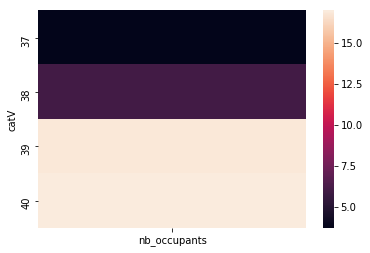

In [93]:
sns.heatmap(tab2.sort_values("nb_occupants"))

# multi cursor : alt + clic

In [94]:
info_vehicules = {
1 : "Bicyclette",
2 : "Cyclomoteur <50cm3",
3 : "Voiturette (Quadricycle à moteur carrossé) (anciennement voiturette ou tricycle à moteur)",
4 : "Référence plus utilisée depuis 2006 (scooter immatriculé)",
5 : "Référence plus utilisée depuis 2006 (motocyclette)",
6 : "Référence plus utilisée depuis 2006 (side-car)",
7 : "VL seul",
8 : "Catégorie plus utilisée (VL + caravane)",
9 : "Catégorie plus utilisée (VL + remorque)",
10 : "VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)",
11 : "Référence plus utilisée depuis 2006 (VU (10) + caravane)",
12 : "Référence plus utilisée depuis 2006 (VU (10) + remorque)",
13 : "PL seul 3,5T <PTCA <= 7,5T",
14 : "PL seul > 7,5T",
15 : "PL > 3,5T + remorque",
16 : "Tracteur routier seul",
17 : "Tracteur routier + semi-remorque",
18 : "Référence plus utilisée depuis 2006 (transport en commun)",
19 : "Référence plus utilisée depuis 2006 (tramway)",
20 : "Engin spécial",
21 : "Tracteur agricole",
30 : "Scooter < 50 cm3",
31 : "Motocyclette > 50 cm et <= 125 cm",
32 : "Scooter >50cm et<=125cm",
33 : "Motocyclette",
34 : "Scooer",
35 : "Quad",
36 : "Quad lourd > 50 cm (Quadricycle à moteur non carrossé)",
37 : "Autobus",
38 : "Autocar",
39 : "Train",
40 : "Tramway",
99 : "Autre véhicule"}

In [95]:
!git add ./accidents_corporels_de_la_circulation.ipynb
!git commit -m "next"
!git push origin

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
	modified:   ib02_accidents_corporels_de_la_circulation.ipynb

Untracked files:
	.ipynb_checkpoints/
	Untitled1.ipynb
	formation_python/

no changes added to commit
Everything up-to-date


In [96]:
info_vehicules

{1: 'Bicyclette',
 2: 'Cyclomoteur <50cm3',
 3: 'Voiturette (Quadricycle à moteur carrossé) (anciennement voiturette ou tricycle à moteur)',
 4: 'Référence plus utilisée depuis 2006 (scooter immatriculé)',
 5: 'Référence plus utilisée depuis 2006 (motocyclette)',
 6: 'Référence plus utilisée depuis 2006 (side-car)',
 7: 'VL seul',
 8: 'Catégorie plus utilisée (VL + caravane)',
 9: 'Catégorie plus utilisée (VL + remorque)',
 10: 'VU seul 1,5T <= PTAC <= 3,5T avec ou sans remorque (anciennement VU seul 1,5T <= PTAC <= 3,5T)',
 11: 'Référence plus utilisée depuis 2006 (VU (10) + caravane)',
 12: 'Référence plus utilisée depuis 2006 (VU (10) + remorque)',
 13: 'PL seul 3,5T <PTCA <= 7,5T',
 14: 'PL seul > 7,5T',
 15: 'PL > 3,5T + remorque',
 16: 'Tracteur routier seul',
 17: 'Tracteur routier + semi-remorque',
 18: 'Référence plus utilisée depuis 2006 (transport en commun)',
 19: 'Référence plus utilisée depuis 2006 (tramway)',
 20: 'Engin spécial',
 21: 'Trac

# Mapper les clefs d'un dictionnaire sur leur valeur dans une colonne

In [97]:
vehicules_2016["label_vehicule"]=vehicules_2016.catV.map(info_vehicules)
vehicules_2016.head().T

,0,1,2,3,4
Num_Acc,201600000001,201600000001,201600000002,201600000003,201600000004
sens_de_Circulation,0,0,0,0,0
catV,7,2,7,7,32
nb_occupants,0,0,0,0,0
obstacle_fixe,0,0,6,0,0
obstacle_mobile,0,0,0,1,0
choc,1,7,1,6,1
manoeuvre,1,15,1,1,1
num_vehicule,B02,A01,A01,A01,B02
transport_en_commun,False,False,False,False,False


In [98]:
vehicules_2016.columns

Index(['Num_Acc', 'sens_de_Circulation', 'catV', 'nb_occupants',
       'obstacle_fixe', 'obstacle_mobile', 'choc', 'manoeuvre', 'num_vehicule',
       'transport_en_commun', 'label_vehicule'],
      dtype='object')

In [99]:
labels = {
0 : "inconnu_0",
1 : "Piéton",
2 : "Véhicule",
4 : "Véhicule sur rail",
5 : "Animal domestique 6",
6 : "Animal sauvage",
9 : "Autre",
None : "inconnu"}

In [100]:
sorted(vehicules_2016.obstacle_mobile.unique())

[0.0, 1.0, 2.0, 4.0, 5.0, 6.0, 9.0, nan]

In [101]:
vehicules_2016["label_obstacle_mobile"] = vehicules_2016.obstacle_mobile.map(labels)

In [102]:
tab = vehicules_2016[vehicules_2016.transport_en_commun].pivot_table(index=["label_vehicule"],
                           values=["nb_occupants"],
                                 columns=["label_obstacle_mobile"],
                          aggfunc="sum")

In [104]:
tab

nb_occupants                                       \
label_obstacle_mobile        Autre Piéton Véhicule Véhicule sur rail   
label_vehicule                                                            
Autobus                      126.0   784.0    1313.0                NaN   
Autocar                        2.0   210.0     917.0                NaN   
Train                          NaN    34.0     187.0                1.0   
Tramway                       10.0   883.0    1483.0                0.0   

                                 
label_obstacle_mobile inconnu_0  
label_vehicule                   
Autobus                   520.0  
Autocar                   256.0  
Train                     300.0  
Tramway                   171.0

# Heatmap

In [121]:
from matplotlib import pyplot as plt

In [164]:
tab

nb_occupants                                       \
label_obstacle_mobile        Autre Piéton Véhicule Véhicule sur rail   
label_vehicule                                                            
Autobus                      126.0   784.0    1313.0                NaN   
Autocar                        2.0   210.0     917.0                NaN   
Train                          NaN    34.0     187.0                1.0   
Tramway                       10.0   883.0    1483.0                0.0   

                                 
label_obstacle_mobile inconnu_0  
label_vehicule                   
Autobus                   520.0  
Autocar                   256.0  
Train                     300.0  
Tramway                   171.0

# Cellule markdown
créer une cellule au dessus => ESC +A

en dessous => ESC + B

# Tri des lignes par dangerosité

In [212]:
tri_vehicules = tab.sum(axis=1).sort_values().index
list(reversed(tri_vehicules))

['Autobus', 'Tramway', 'Autocar', 'Train']

In [214]:
# affichage du pivot table par dangerosité des véhicules
tab.loc[reversed(tri_vehicules)]

nb_occupants                                       \
label_obstacle_mobile        Autre Piéton Véhicule Véhicule sur rail   
label_vehicule                                                            
Autobus                      126.0   784.0    1313.0                NaN   
Tramway                       10.0   883.0    1483.0                0.0   
Autocar                        2.0   210.0     917.0                NaN   
Train                          NaN    34.0     187.0                1.0   

                                 
label_obstacle_mobile inconnu_0  
label_vehicule                   
Autobus                   520.0  
Tramway                   171.0  
Autocar                   256.0  
Train                     300.0

# Tri des colonnes par dangerosité

In [215]:
_ = tab.sum().sort_values()
_

              label_obstacle_mobile
nb_occupants  Véhicule sur rail          1.0
              Autre                     138.0
              inconnu_0                1247.0
              Piéton                  1911.0
              Véhicule                3900.0
dtype: float64

In [239]:
tri_obstacles = _.reset_index()["label_obstacle_mobile"]

In [240]:
tri_obstacles

0    Véhicule sur rail
1                 Autre
2             inconnu_0
3               Piéton
4             Véhicule
Name: label_obstacle_mobile, dtype: object

In [242]:
tri_vehicules

Index(['Train', 'Autocar', 'Tramway', 'Autobus'], dtype='object', name='label_vehicule')

In [243]:
tab.loc[tri_vehicules,:]

nb_occupants                                       \
label_obstacle_mobile        Autre Piéton Véhicule Véhicule sur rail   
label_vehicule                                                            
Train                          NaN    34.0     187.0                1.0   
Autocar                        2.0   210.0     917.0                NaN   
Tramway                       10.0   883.0    1483.0                0.0   
Autobus                      126.0   784.0    1313.0                NaN   

                                 
label_obstacle_mobile inconnu_0  
label_vehicule                   
Train                     300.0  
Autocar                   256.0  
Tramway                   171.0  
Autobus                   520.0

In [233]:
tri_obstacles

['Véhicule sur rail', 'Autre', 'inconnu_0', 'Piéton', 'Véhicule']

In [206]:
tri = tab.sum().sort_values().index
list(reversed(tri))

[('nb_occupants', 'Véhicule'),
 ('nb_occupants', 'Piéton'),
 ('nb_occupants', 'inconnu_0'),
 ('nb_occupants', 'Autre'),
 ('nb_occupants', 'Véhicule sur rail')]

[None, None, None, None, None, None, None, None, None, None]

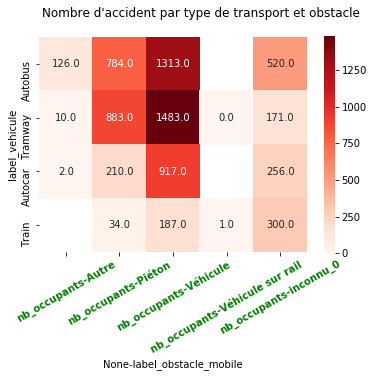

In [199]:
title = "Nombre d'accident par type de transport et obstacle"
ax = sns.heatmap(tab.loc[reversed(tri)], cmap="Reds", square=True, annot=True, fmt="", cbar=True)
fig = plt.gcf()
#fig.set_size_inches(10,10)
fig.suptitle(title)
props = {"rotation" : 30, "color":"green", "fontweight":"bold"}
plt.setp(ax.get_xticklabels(), **props)


In [40]:
vehicules_2016.columns

Index(['Num_Acc', 'sens_de_Circulation', 'catV', 'nb_occupants',
       'obstacle_fixe', 'obstacle_mobile', 'choc', 'manoeuvre', 'num_vehicule',
       'transport_en_commun', 'label_vehicule', 'label_obstacle_mobile'],
      dtype='object')

In [41]:
vehicules_2016.pivot_table(index="transport_en_commun", 
                           values="nb_occupants", 
                           aggfunc="sum")

transport_en_commun
False       0
True     7197
Name: nb_occupants, dtype: int64

In [42]:
vehicules_2016.pivot_table(index="transport_en_commun", 
                           values="nb_occupants", 
                           aggfunc="count").sum()


101924

In [43]:
vehicules_2016.shape

(101924, 12)

In [44]:
vehicules_2016

,Num_Acc,sens_de_Circulation,catV,nb_occupants,obstacle_fixe,obstacle_mobile,choc,manoeuvre,num_vehicule,transport_en_commun,label_vehicule,label_obstacle_mobile
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02,False,VL seul,inconnu_0
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01,False,Cyclomoteur <50cm3,inconnu_0
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01,False,VL seul,inconnu_0
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01,False,VL seul,Piéton
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02,False,Scooter >50cm et<=125cm,inconnu_0
5,201600000004,0.0,7,0,0.0,0.0,8.0,15.0,A01,False,VL seul,inconnu_0
6,201600000005,0.0,30,0,0.0,2.0,1.0,15.0,B02,False,Scooter < 50 cm3,Véhicule
7,201600000005,0.0,7,0,0.0,2.0,3.0,1.0,A01,False,VL seul,Véhicule
8,201600000006,0.0,7,0,0.0,1.0,1.0,1.0,A01,False,VL seul,Piéton
9,201600000007,1.0,30,0,0.0,0.0,3.0,15.0,A01,False,Scooter < 50 cm3,inconnu_0


In [45]:
Obstacle_fixe = {
1 : "Véhicule en stationnement",
2 : "Arbre",
3 : "Glissière métallique",
4 : "Glissière béton",
5 : "Autre glissière",
6 : "Bâtiment, mur, pile de pont",
7 : "Support de signalisation verticale ou poste d’appel d’urgence ",
8 : "Poteau",
9 : "Mobilier urbain",
10 : "Parapet",
11 : "Ilot, refuge, borne haute",
12 : "Bordure de trottoir",
13 : "Fossé, talus, paroi rocheuse",
14 : "Autre obstacle fixe sur chaussée",
15 : "Autre obstacle fixe sur trottoir ou accotement 16 – Sortie de chaussée sans obstacle",}

In [46]:
sorted(vehicules_2016.obstacle_fixe.unique())

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 nan]

In [47]:
vehicules_2016.obstacle_fixe.map(Obstacle_fixe)

0                                       NaN
1                                       NaN
2              Bâtiment, mur, pile de pont
3                                       NaN
4                                       NaN
5                                       NaN
6                                       NaN
7                                       NaN
8                                       NaN
9                                       NaN
10                                      NaN
11                                      NaN
12                                      NaN
13                                      NaN
14                                      NaN
15                                      NaN
16                                      NaN
17                                      NaN
18                                      NaN
19                                      NaN
20        Autre obstacle fixe sur chaussée
21                                      NaN
22                              

In [ ]:
vehicules_2016.label_obstacle_mobile

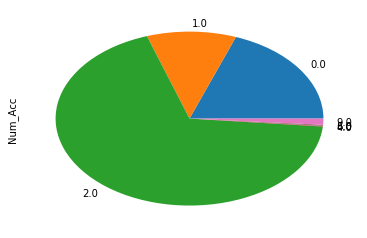

In [50]:
vehicules_2016.groupby("obstacle_mobile")["Num_Acc"].count().plot.pie()

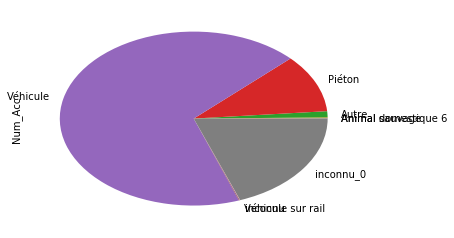

In [51]:
vehicules_2016.groupby("label_obstacle_mobile")["Num_Acc"].count().plot.pie()

In [59]:
def despine_ax(ax):
    """
    Enlève les contours d'un axe dans une figure.
    """
    for spine in ax.spines.values():
        spine.set_visible(False)

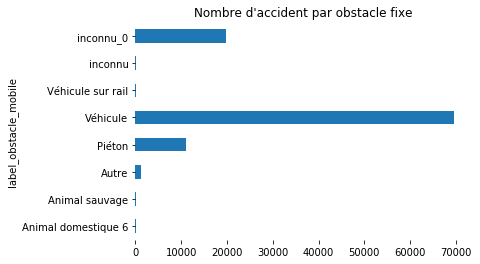

In [60]:
title = "Nombre d'accident par obstacle fixe"
to_plot = vehicules_2016.groupby("label_obstacle_mobile")["Num_Acc"].count()
#barh : 
ax = to_plot.plot.barh(title=title)
despine_ax(ax)

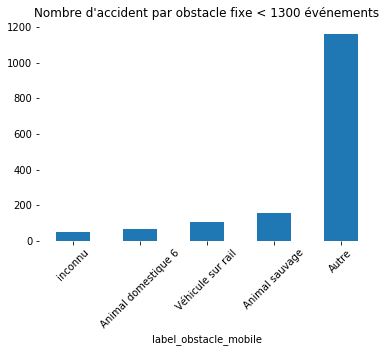

In [78]:
title = "Nombre d'accident par obstacle fixe < 1300 événements"
to_plot = vehicules_2016.groupby("label_obstacle_mobile")["Num_Acc"].count()
#bar : 
limite = 5
ax = to_plot.sort_values()[:limite].plot.bar(title=title, rot=45)
despine_ax(ax)
#ax.set_ylim(0, 1300)

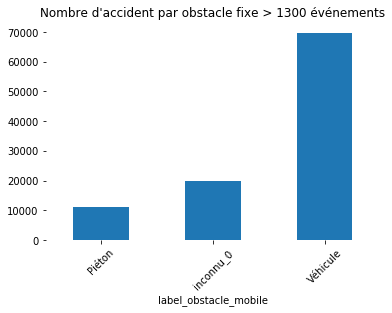

In [79]:
title = "Nombre d'accident par obstacle fixe > 1300 événements"
ax = to_plot.sort_values()[limite:].plot.bar(title=title, rot=45)
despine_ax(ax)


In [80]:
from matplotlib import pyplot as plt

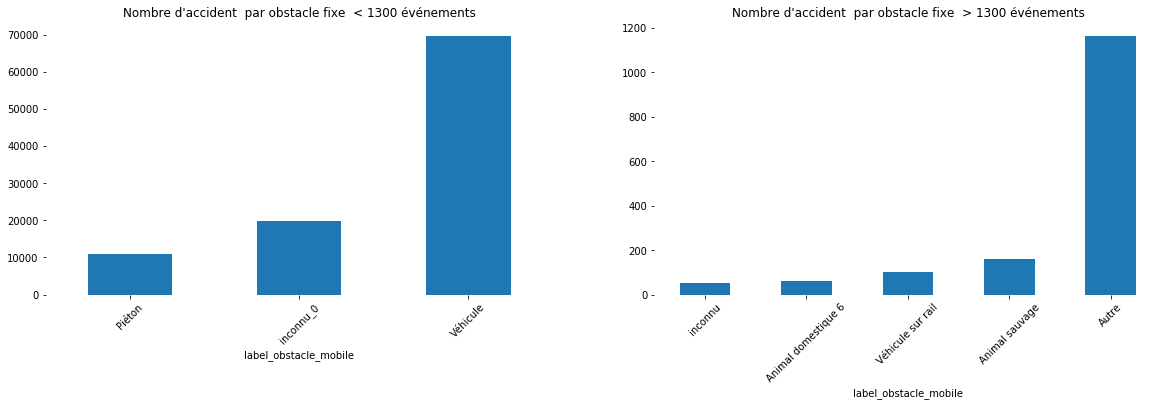

In [99]:
plt.figure(1, figsize=(20,5))

ax    = plt.subplot(121)
title = "Nombre d'accident  par obstacle fixe  < 1300 événements"
to_plot.sort_values()[limite:].plot.bar(title=title, rot=45, ax=ax)
despine_ax(ax)

ax    = plt.subplot(122)
title = "Nombre d'accident  par obstacle fixe  > 1300 événements"
to_plot.sort_values()[:limite].plot.bar(title=title, rot=45, ax=ax)
despine_ax(ax)

In [5]:
path = "~/Downloads/caracteristiques_2016.csv"
caracteristiques_2016 = pd.read_csv(path, encoding="latin1")

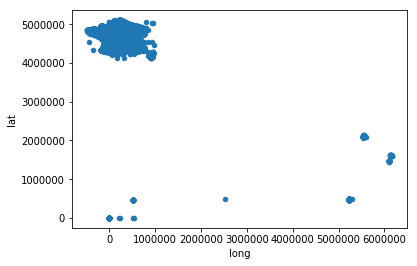

In [6]:
caracteristiques_2016.plot.scatter(x="long", y="lat")

In [7]:
caracteristiques_2016.columns

Index(['Num_Acc', 'an', 'mois', 'jour', 'hrmn', 'lum', 'agg', 'int', 'atm',
       'col', 'com', 'adr', 'gps', 'lat', 'long', 'dep'],
      dtype='object')

In [8]:
col_accident = "Num_Acc"

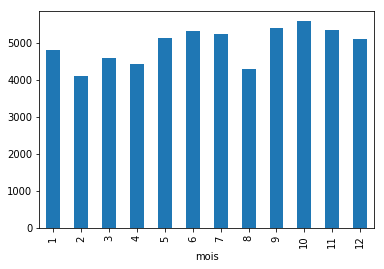

In [9]:
caracteristiques_2016.groupby("mois")[col_accident].count().plot.bar()

atm Conditions atmosphériques : 

Conditions atmosphériques : 1 – Normale

2 – Pluie légère

3 – Pluie forte

4 – Neige - grêle

5 – Brouillard - fumée 6 – Vent fort - tempête 7 – Temps éblouissant 8 – Temps couvert

9 – Autr


In [10]:
meteo = {1 : "Normale",
2 : "Pluie légère",
3 : "Pluie forte",
4 : "Neige - grêle",
5 : "Brouillard - fumée 6 – Vent fort - tempête 7 – Temps éblouissant 8 – Temps couvert",
9 : "Autr"}

In [11]:
caracteristiques_2016.atm = caracteristiques_2016.atm.map(meteo)

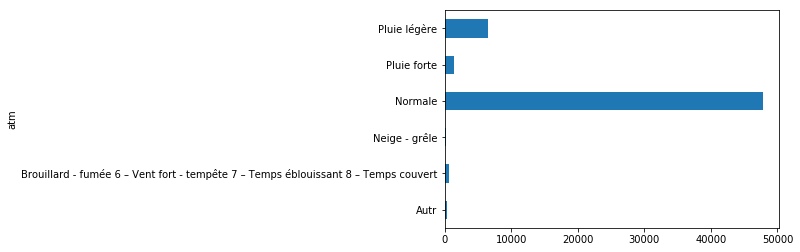

In [12]:
caracteristiques_2016.groupby("atm")[col_accident].count().plot.barh()

In [13]:
caracteristiques_2016.shape

(59432, 16)

In [23]:
path = "~/Downloads/lieux_2016.csv"
lieux_2016 = pd.read_csv(path, encoding="latin1")

/Users/romain/anaconda3/envs/python360/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [24]:
lieux_2016

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201600000001,3,39,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
1,201600000002,3,39,NaN,NaN,1.0,0.0,NaN,NaN,0.0,1.0,2.0,0.0,58.0,1.0,0.0,1.0,0.0
2,201600000003,3,1,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,3.0,0.0,68.0,2.0,0.0,3.0,99.0
3,201600000004,4,0,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
4,201600000005,4,0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,3.0
5,201600000006,3,41,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,99.0
6,201600000007,3,1,NaN,NaN,2.0,0.0,NaN,NaN,0.0,1.0,1.0,70.0,0.0,1.0,0.0,1.0,99.0
7,201600000008,3,2,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,0.0,70.0,1.0,0.0,1.0,0.0
8,201600000009,4,0,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,99.0
9,201600000010,4,0,NaN,A,2.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,44.0,7.0,0.0,1.0,0.0


In [17]:
path = "/Users/romain/Downloads/usagers_2016.csv"
usagers_2016 = pd.read_csv(path, encoding="latin1")

In [19]:
path = "/Users/romain/Downloads/vehicules_2016.csv"
vehicules_2016 = pd.read_csv(path, encoding="latin1")

In [20]:
vehicules_2016

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201600000001,0.0,7,0,0.0,0.0,1.0,1.0,B02
1,201600000001,0.0,2,0,0.0,0.0,7.0,15.0,A01
2,201600000002,0.0,7,0,6.0,0.0,1.0,1.0,A01
3,201600000003,0.0,7,0,0.0,1.0,6.0,1.0,A01
4,201600000004,0.0,32,0,0.0,0.0,1.0,1.0,B02
5,201600000004,0.0,7,0,0.0,0.0,8.0,15.0,A01
6,201600000005,0.0,30,0,0.0,2.0,1.0,15.0,B02
7,201600000005,0.0,7,0,0.0,2.0,3.0,1.0,A01
8,201600000006,0.0,7,0,0.0,1.0,1.0,1.0,A01
9,201600000007,1.0,30,0,0.0,0.0,3.0,15.0,A01
